# **Departamento de marketing**

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



# Importação das bibliotecas e base de dados

In [42]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [43]:
# carregar a base de dados
import pandas as pd
# para termos acesso as funções matemáticas
import numpy as np
# biblioteca para gerar gráficos
import seaborn as sns
# também para gerar gráficos
import matplotlib.pyplot as plt
import plotly.express as px
# fazer processamento dos dados (colocar todos os dados no mesmo padrão)
from sklearn.preprocessing import StandardScaler
# fazer a ceguementação do mercado ou agrupamento dos clientes
from sklearn.cluster import KMeans
# redução de dimensonalidade dos dados
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [12]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [13]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Visualização e exploração dos dados

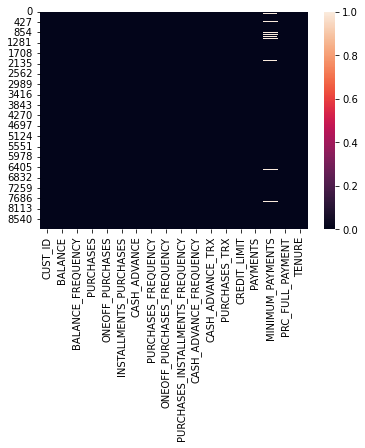

In [15]:
# Visualizar se tem dados faltantes
sns.heatmap(creditcard_df.isnull());

In [16]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# realizar o preenchimento dos dados faltantes com a média

In [17]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [19]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [20]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [21]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [22]:
# visualizar se realmente foi preenchidos os dados
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

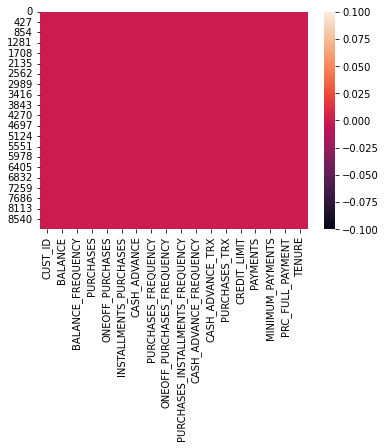

In [23]:
sns.heatmap(creditcard_df.isnull());

In [24]:
# ver se tem dados duplicados
creditcard_df.duplicated().sum()

0

In [25]:
# deletar o  Identificação do titular do cartão de crédito
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [26]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [28]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

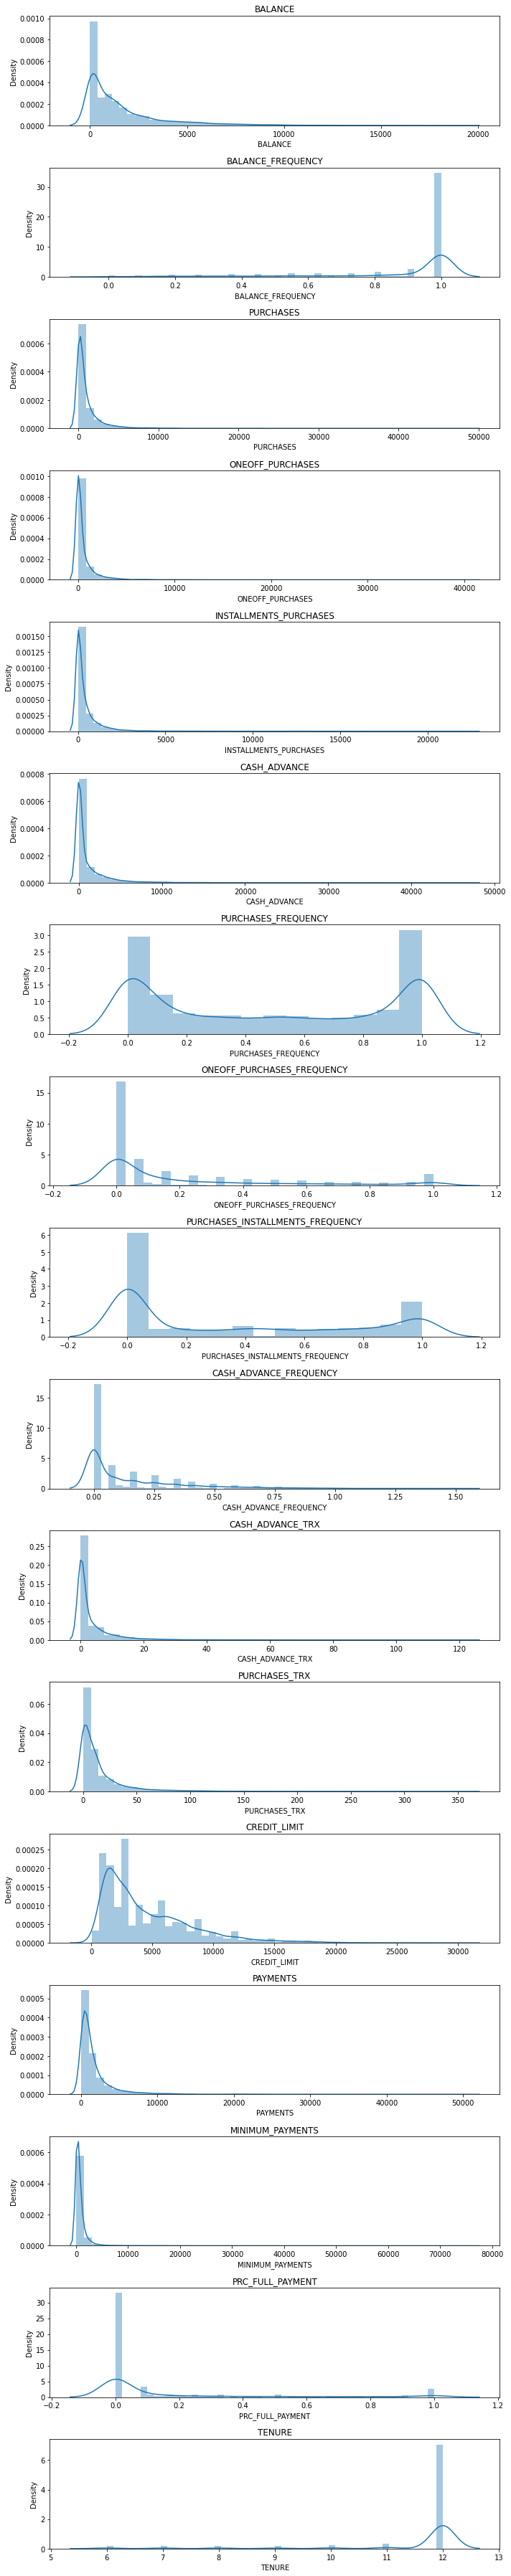

In [29]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

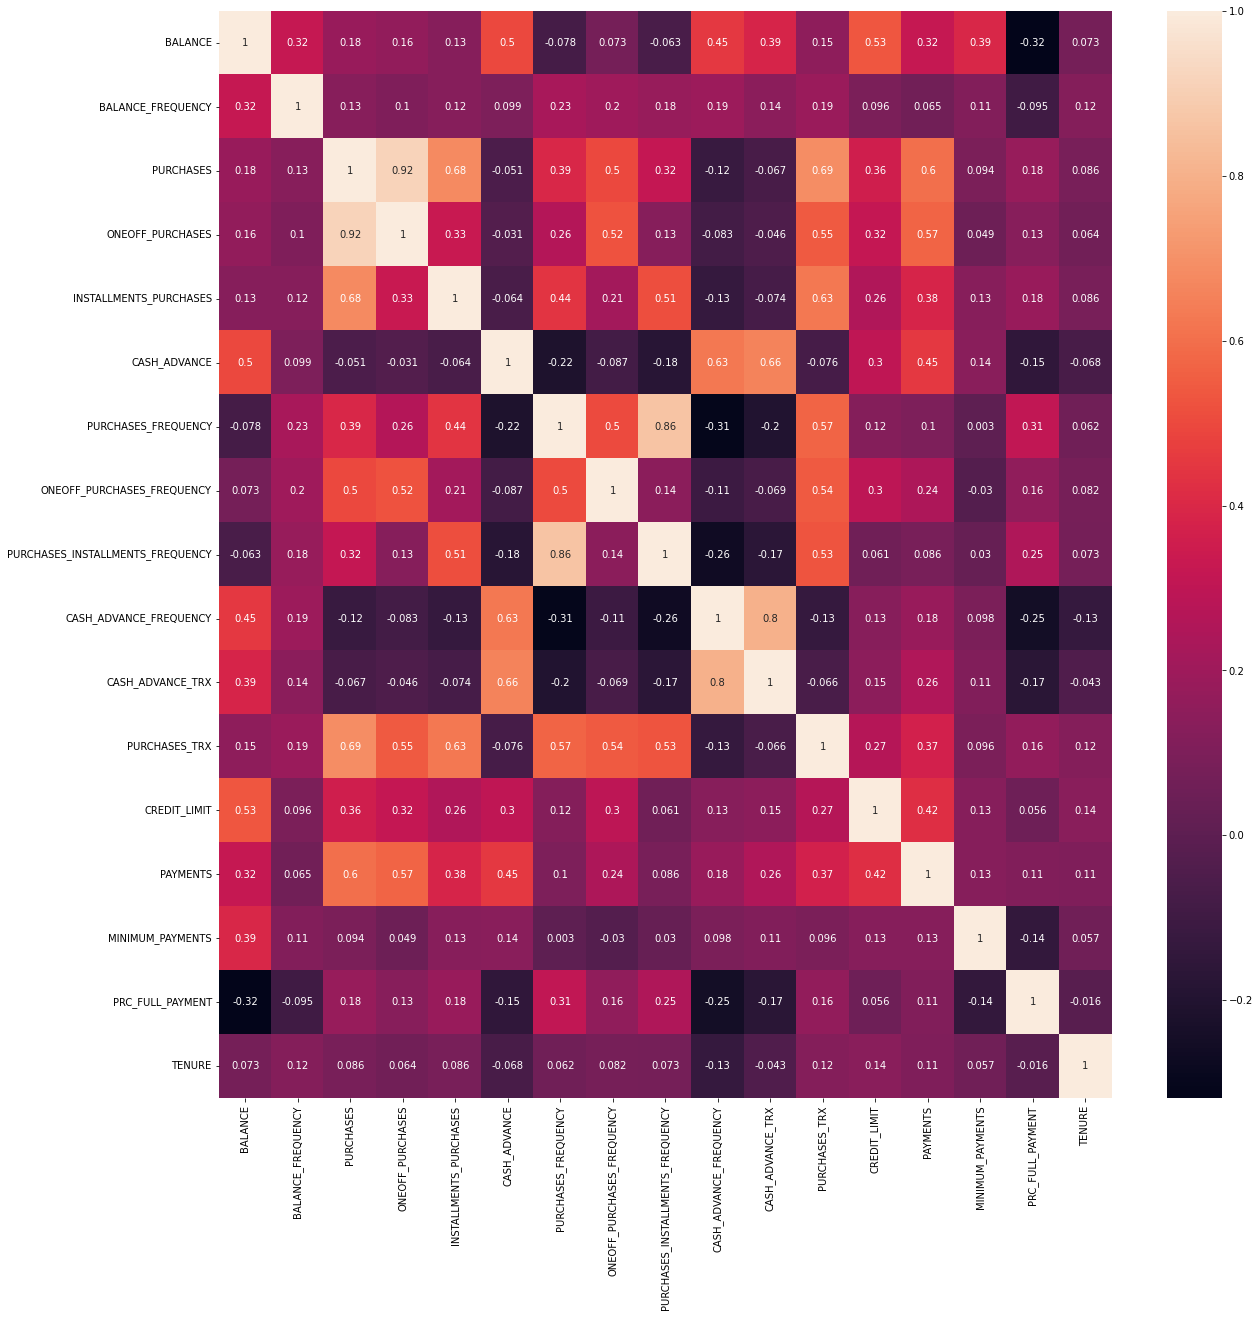

In [31]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

# **Definição do número de clusters usando o Elbow Method**

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [32]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [33]:
# colocar os dados na mesma escalar
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [34]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [35]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [36]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [37]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [38]:
print(wcss_1)

[152149.99999999983, 127784.89277341869, 111986.69806610125, 99073.93826774803, 91502.98259428913, 84851.17091613081, 79660.400204965, 75103.9548612822, 71217.9119910437, 68234.87085222299, 63654.93683975565, 61352.78027922223, 59183.19947030004, 57498.92940401396, 55834.62364024727, 54287.41654494594, 53066.85256821533, 52057.67115507924, 50766.92481314328]


In [45]:
grafico = px.line(x = range(1,20), y = wcss_1)
grafico.show()

# **Agrupamento com k-mean**

In [112]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [113]:
labels, len(labels)

(array([0, 3, 5, ..., 7, 7, 7], dtype=int32), 8950)

In [114]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2663,  546,  933,  849, 1118, 2189,   30,  622]))

In [115]:
kmeans.cluster_centers_

array([[ 2.62557486e-02,  4.02351268e-01, -3.62669547e-01,
        -2.42012042e-01, -4.12781448e-01, -7.60631373e-02,
        -8.93615846e-01, -4.03997029e-01, -7.93039476e-01,
         1.36702764e-01, -8.03464757e-03, -4.93912261e-01,
        -2.91443492e-01, -2.44000529e-01, -4.57229271e-03,
        -4.53148303e-01,  2.70674133e-01],
       [ 7.64239356e-01,  4.72814052e-01,  2.06271572e+00,
         1.73007647e+00,  1.69885119e+00, -2.11459954e-01,
         1.15469418e+00,  1.73539213e+00,  1.07466190e+00,
        -3.08501463e-01, -2.26207292e-01,  2.43697360e+00,
         1.16408130e+00,  1.13795441e+00,  3.30153746e-01,
         2.15231068e-01,  3.16885189e-01],
       [-6.89835359e-01,  1.37606329e-01,  1.45095393e-01,
         1.27206793e-02,  3.19234733e-01, -4.48972015e-01,
         9.14684528e-01,  3.69082092e-01,  7.35900344e-01,
        -6.43116228e-01, -4.58479225e-01,  2.39866868e-01,
         1.42992724e-01, -1.06373761e-01, -2.92183577e-01,
         2.16449476e+00,  1.8

In [116]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.026256,0.402351,-0.362670,-0.242012,-0.412781,-0.076063,-0.893616,-0.403997,-0.793039,0.136703,-0.008035,-0.493912,-0.291443,-0.244001,-0.004572,-0.453148,0.270674
1,0.764239,0.472814,2.062716,1.730076,1.698851,-0.211460,1.154694,1.735392,1.074662,-0.308501,-0.226207,2.436974,1.164081,1.137954,0.330154,0.215231,0.316885
2,-0.689835,0.137606,0.145095,0.012721,0.319235,-0.448972,0.914685,0.369082,0.735900,-0.643116,-0.458479,0.239867,0.142993,-0.106374,-0.292184,2.164495,0.189287
3,1.687924,0.392391,-0.211900,-0.144746,-0.235166,2.055274,-0.460285,-0.168533,-0.422776,1.944477,1.972431,-0.259008,1.030963,0.843892,0.544704,-0.390435,0.063903
4,-0.699832,-2.199888,-0.322797,-0.242849,-0.316951,-0.314584,-0.580570,-0.458343,-0.452526,-0.512164,-0.369379,-0.428460,-0.197611,-0.208295,-0.253704,0.113443,0.195591
5,-0.155194,0.398456,0.039853,-0.049341,0.184797,-0.323143,0.925542,0.251249,0.831140,-0.390756,-0.313542,0.246228,-0.175550,-0.160683,0.009950,-0.336576,0.289367
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.332825,-0.344129,-0.287118,-0.205018,-0.301852,0.072498,-0.196537,-0.269970,-0.234654,0.313908,0.002881,-0.385982,-0.563404,-0.392199,-0.205867,-0.035486,-3.194122


- Grupo 6 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 4: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (107) e não sacam muito dinheiro do limite do cartão (319). 18% de pagamento da fatura completa do cartão de crédito

- Grupo 3: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5077) e sacam muito dinheiro do cartão de crédito (5288), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03) (Grupo de risco)

- Grupo 7 (clientes novos): clientes mais novos (7.24) e que mantém pouco dinheiro na conta corrente (871) 

In [117]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1619.123952,0.972584,228.355756,190.746949,37.794503,819.363160,0.131699,0.081938,0.049263,0.162500,3.193996,2.433021,3434.058787,1026.786227,853.551007,0.021177,11.879550
1,3155.174538,0.989276,5410.228755,3464.009963,1947.317692,535.429711,0.953785,0.720159,0.791535,0.073410,1.705128,75.283883,8729.853480,5027.410361,1633.615922,0.216666,11.941392
2,128.640758,0.909868,1313.203376,613.551093,699.747653,37.355824,0.857458,0.312562,0.656903,0.006450,0.120043,20.672026,5014.715483,1425.202238,183.285042,0.786792,11.770632
3,5077.746080,0.970224,550.477423,352.188014,198.409586,5288.876382,0.305616,0.152181,0.196415,0.524254,16.709220,8.271868,8245.513647,4176.128554,2133.617084,0.039519,11.602837
4,107.833093,0.356138,313.544857,189.357639,124.452692,319.174683,0.257340,0.065725,0.184592,0.032655,0.728086,4.059928,3775.460147,1130.151571,272.960088,0.186895,11.779070
5,1241.451179,0.971661,1088.350749,510.541068,578.176941,301.224652,0.861815,0.277410,0.694754,0.056950,1.109132,20.830137,3855.727365,1267.982090,887.393646,0.055272,11.904566
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2444.556993,597.766825,384.441450,0.143336,7.242765


In [118]:
labels, len(labels)

(array([0, 3, 5, ..., 7, 7, 7], dtype=int32), 8950)

In [119]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


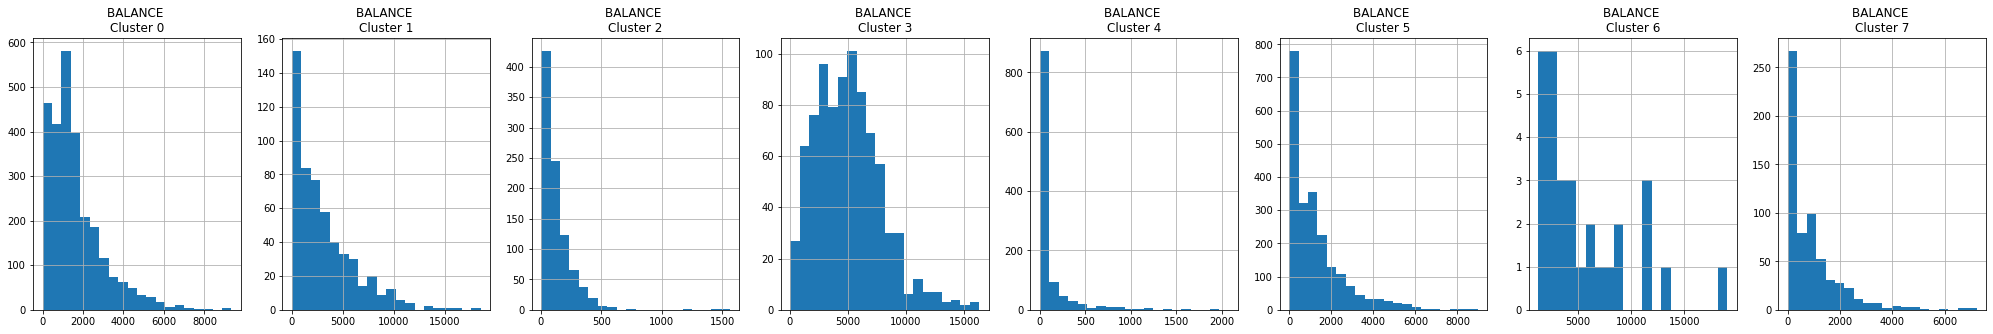

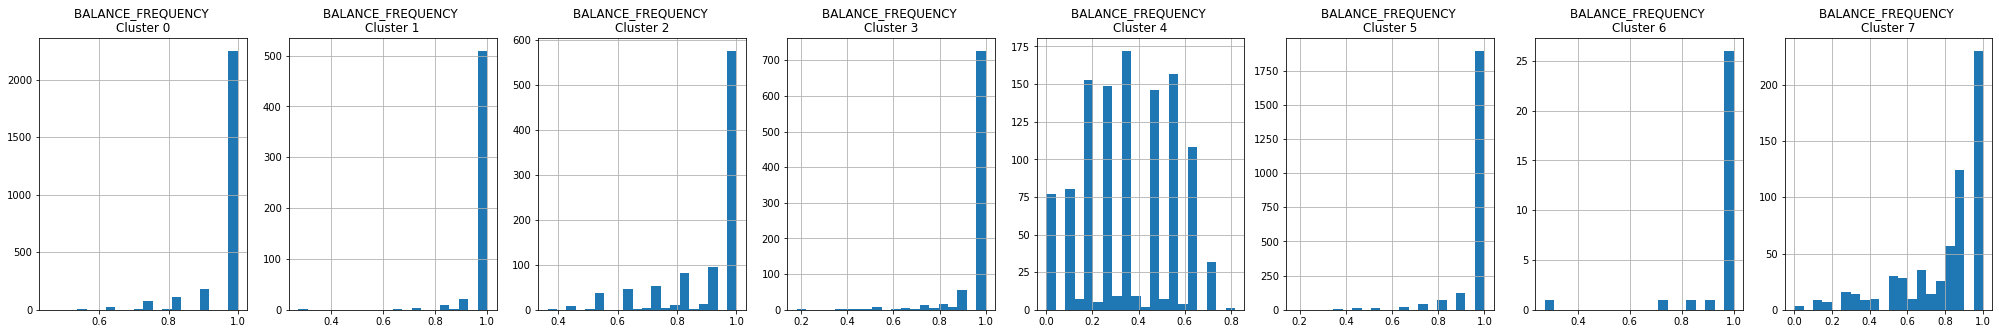

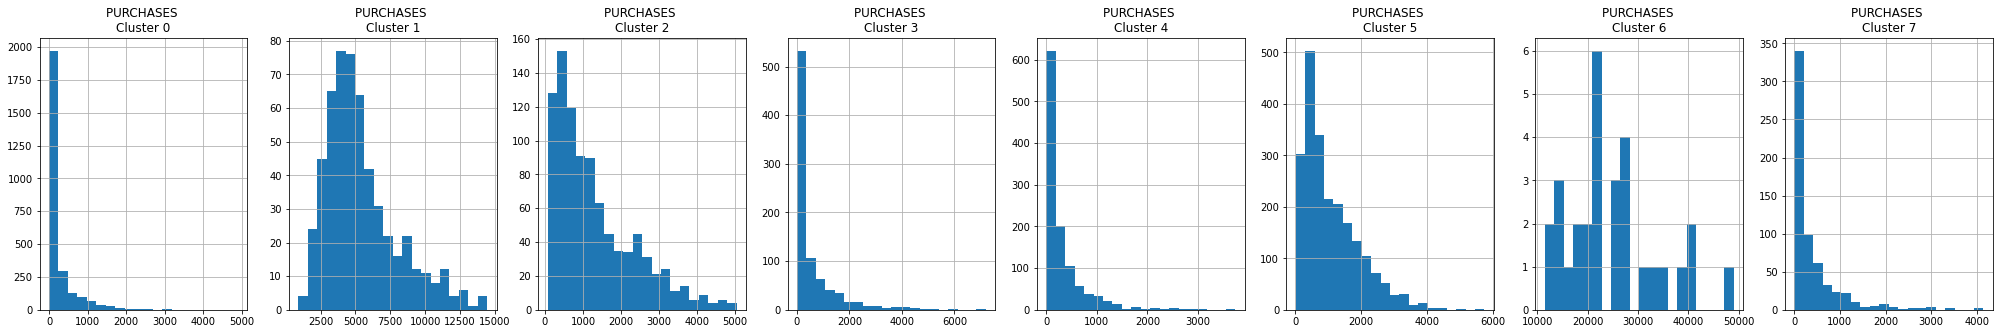

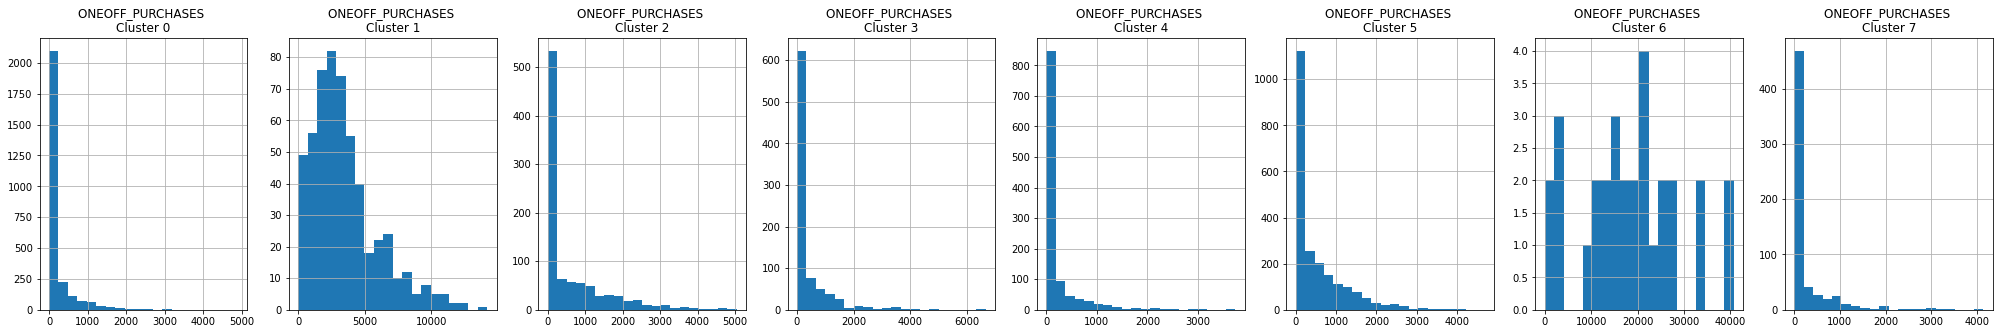

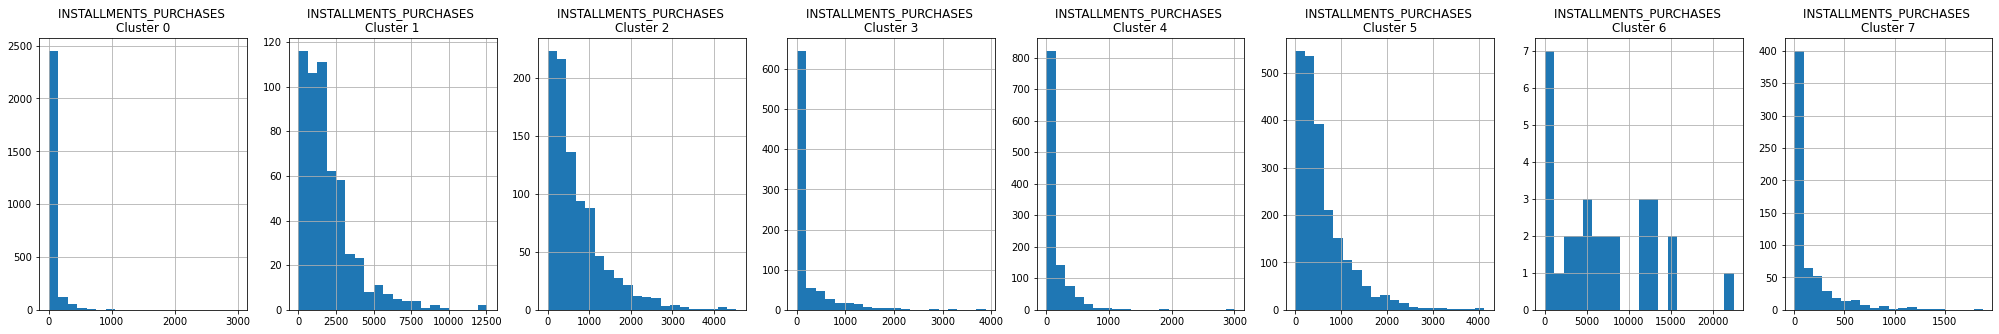

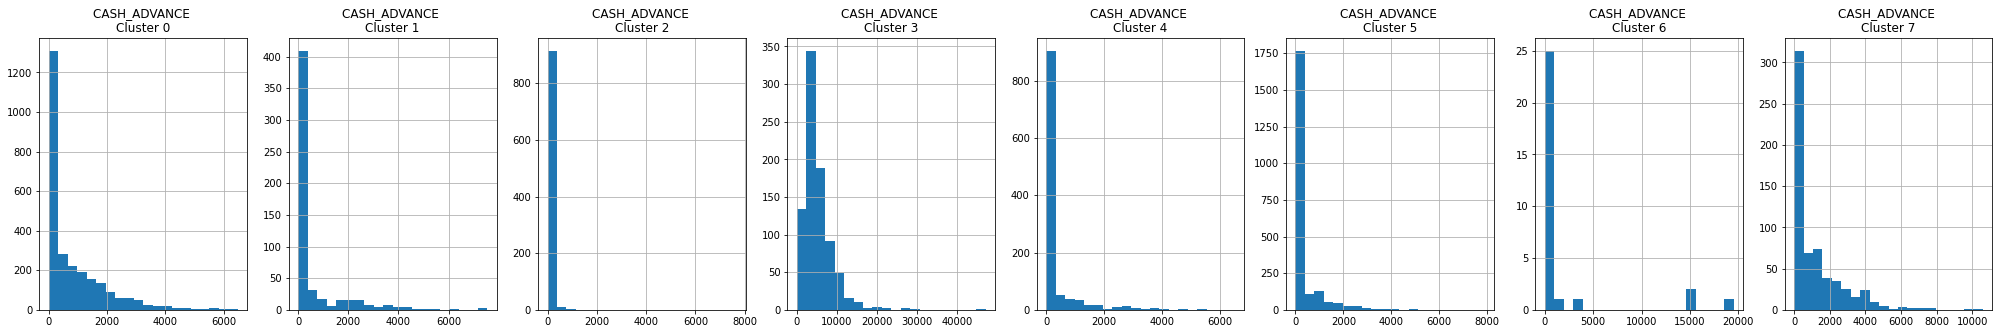

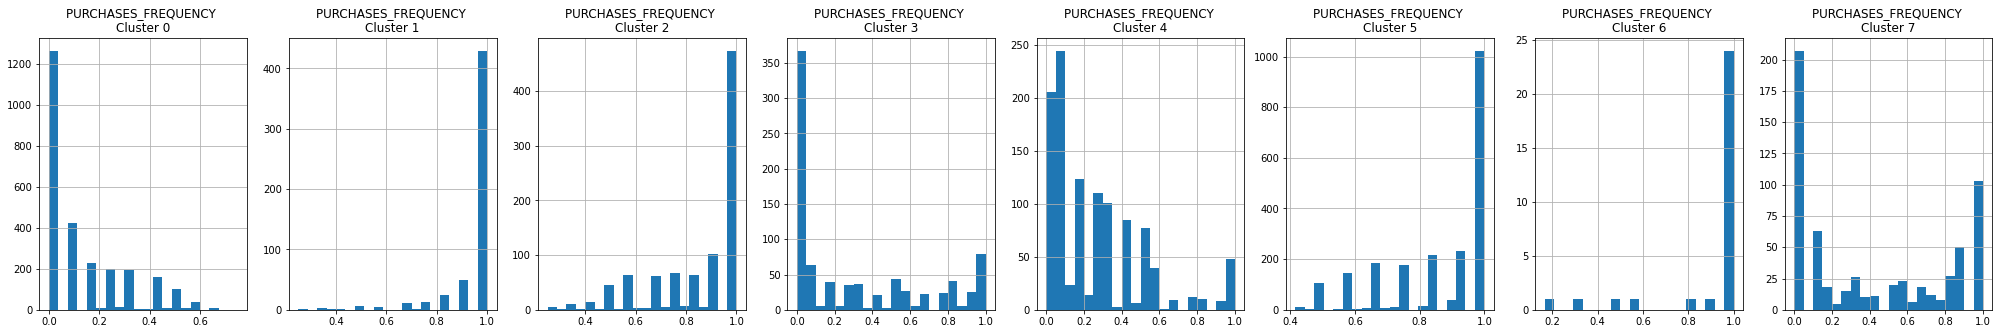

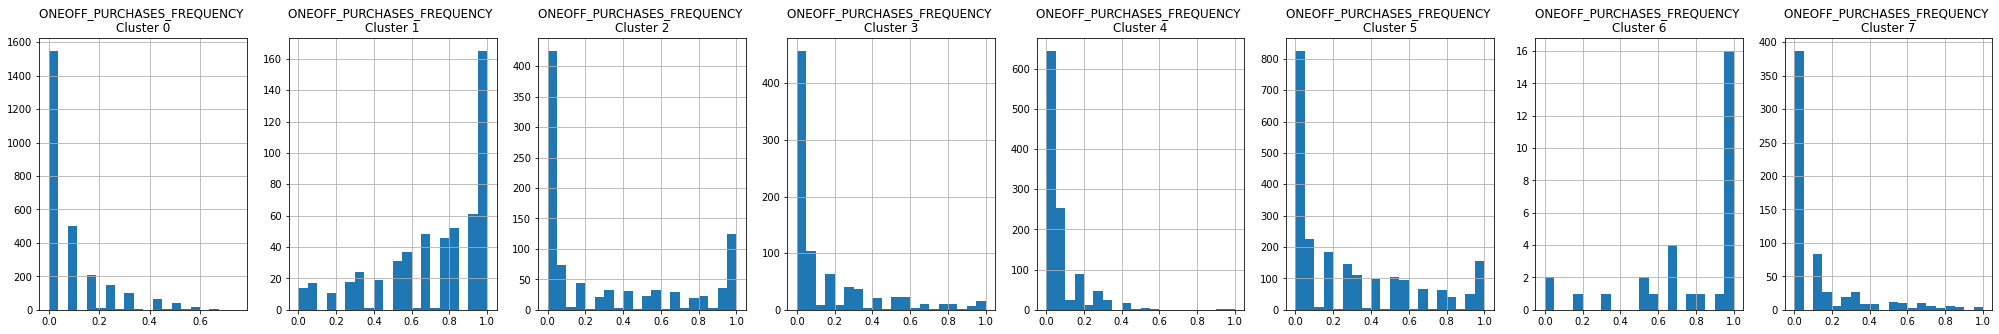

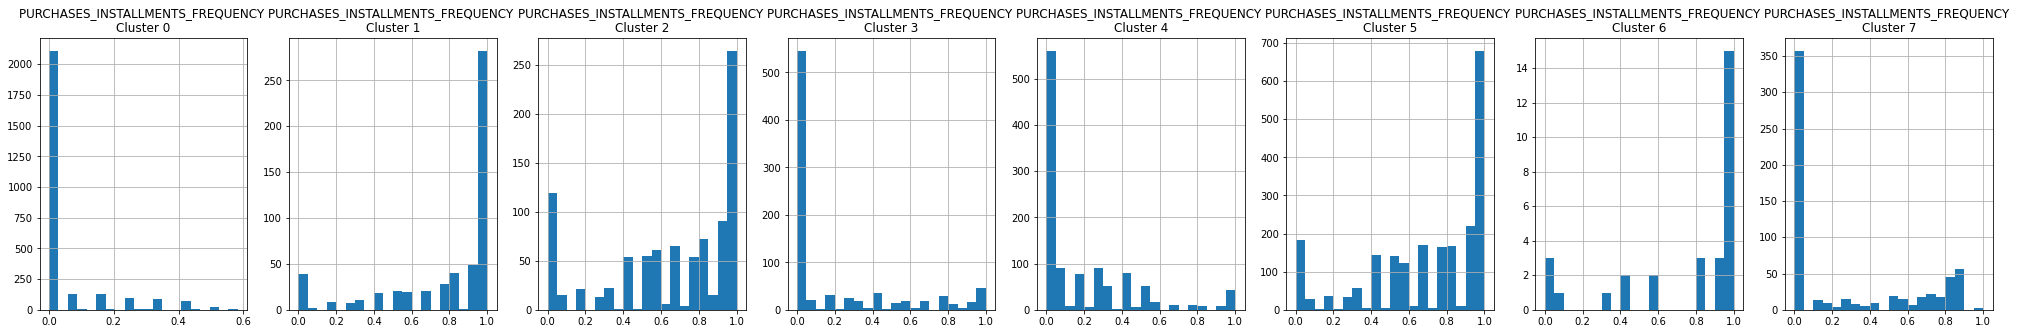

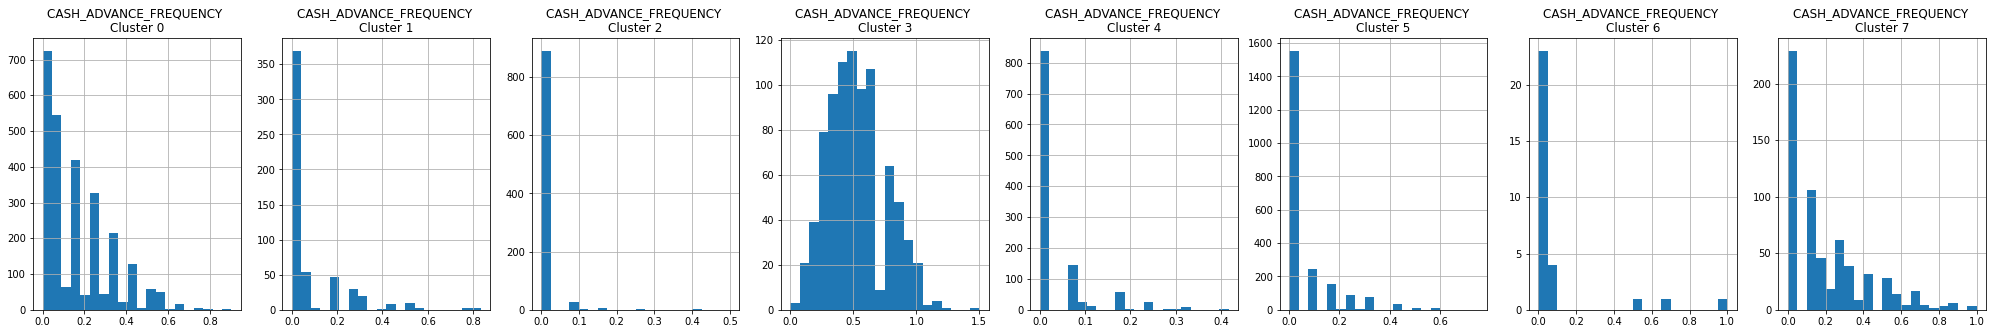

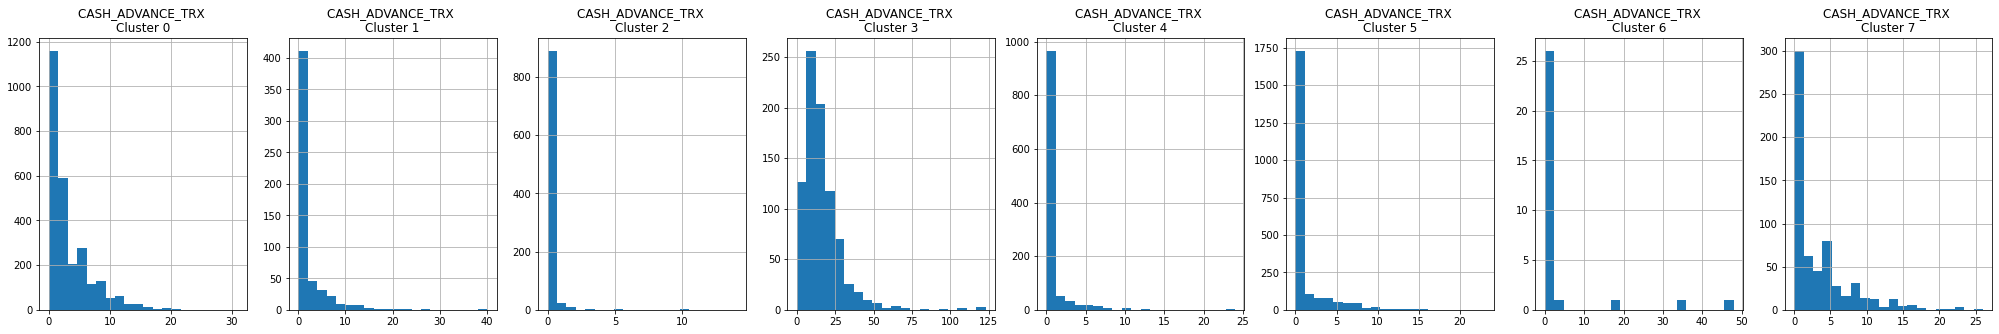

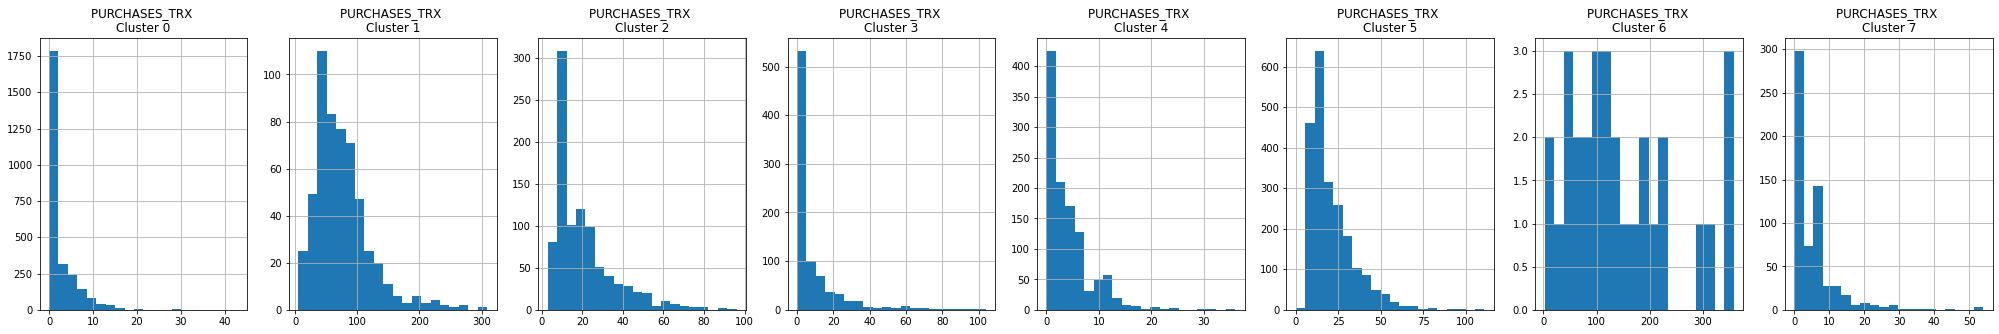

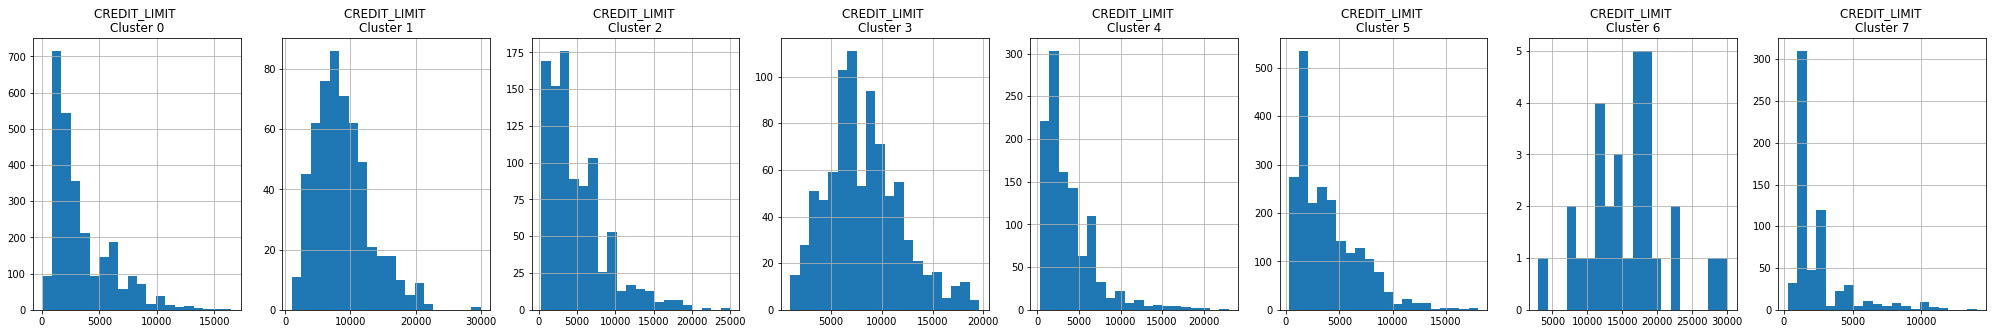

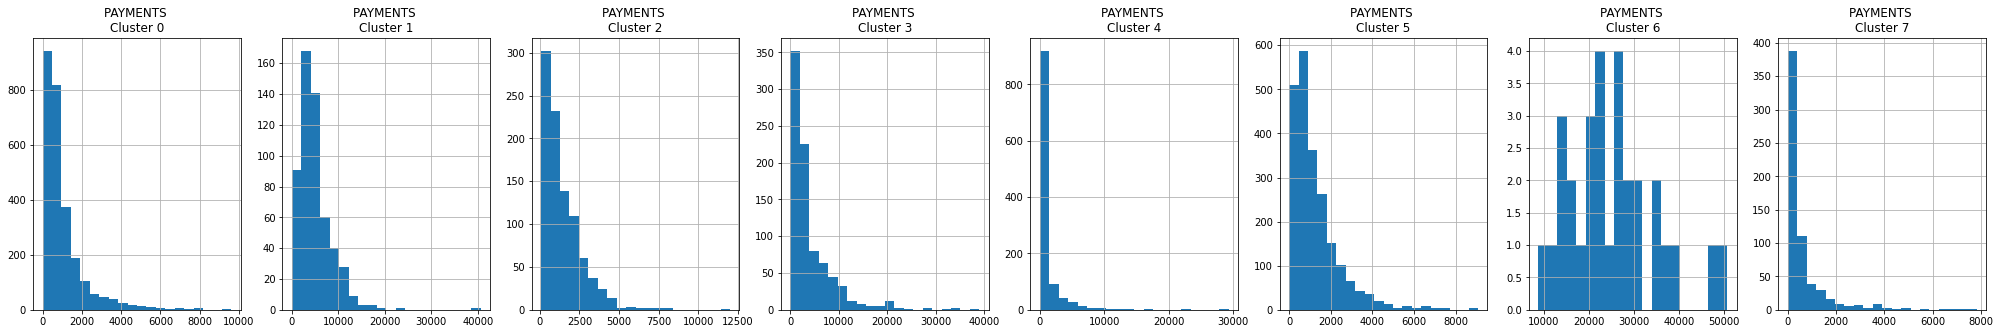

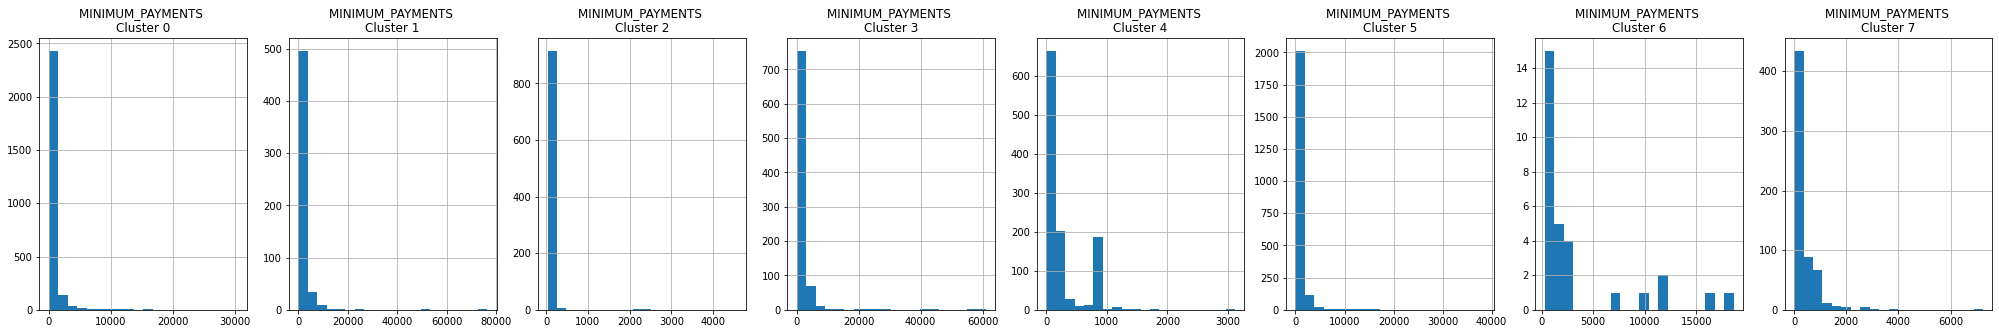

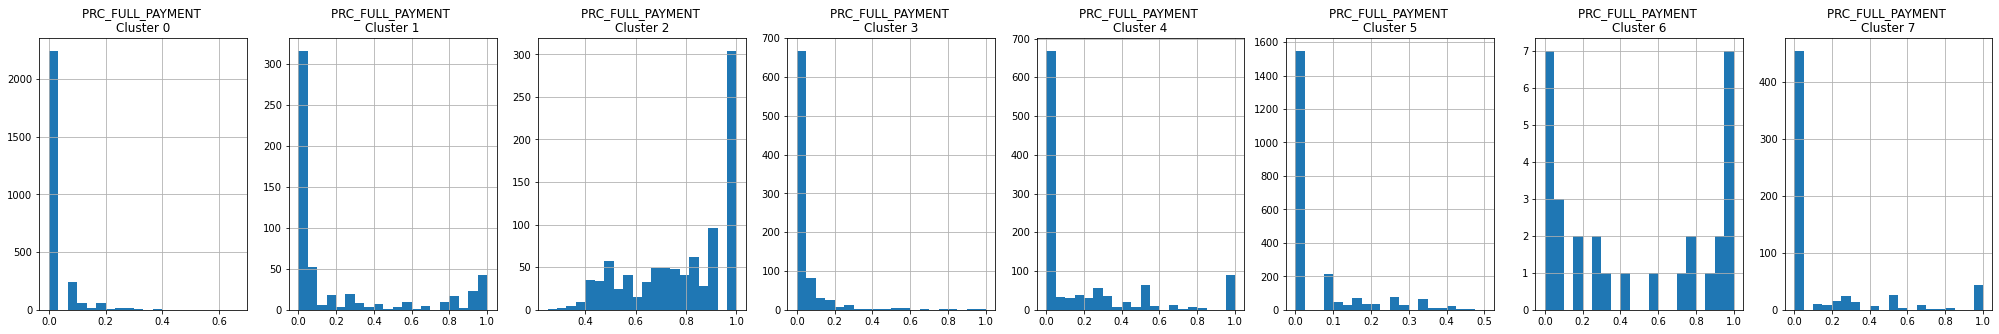

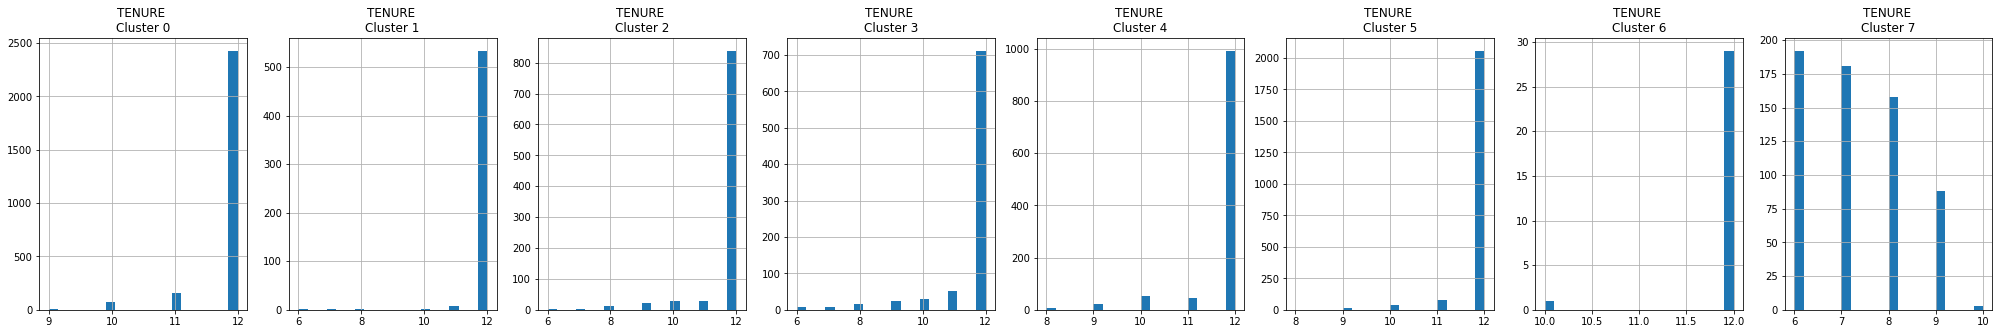

In [120]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [121]:
# Ordenando os dados pelo os cluster
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4178,1018.880453,1.000000,0.00,0.00,0.00,2583.510846,0.000000,0.000000,0.000000,0.500000,8,0,13000.0,1703.232165,243.188640,0.000000,12,0
4181,1604.476717,0.800000,2619.70,2619.70,0.00,3041.406240,0.600000,0.600000,0.000000,0.300000,3,10,6000.0,2045.152399,330.428974,0.142857,10,0
4183,378.001129,1.000000,1884.04,1884.04,0.00,104.557174,0.416667,0.416667,0.000000,0.083333,1,10,5000.0,2249.919761,164.460238,0.222222,12,0
4192,190.324034,1.000000,322.33,238.97,83.36,0.000000,0.250000,0.083333,0.166667,0.000000,0,3,6500.0,524.430161,175.583266,0.000000,12,0


In [122]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3362,10.785694,0.444444,384.40,0.00,384.4,0.000000,0.888889,0.000000,0.777778,0.000000,0,8,1500.0,655.428475,65.251585,0.333333,9,7
1672,99.912238,1.000000,730.20,165.00,565.2,0.000000,1.000000,0.142857,0.857143,0.000000,0,13,1000.0,463.326909,101.919615,0.500000,7,7
7658,3.019634,0.250000,45.60,0.00,45.6,0.000000,0.250000,0.000000,0.250000,0.000000,0,2,1600.0,73.212859,111.928897,0.000000,8,7
7582,1516.447170,1.000000,0.00,0.00,0.0,2817.911587,0.000000,0.000000,0.000000,0.142857,1,0,6000.0,4161.937341,297.615348,0.285714,7,7
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,7


In [124]:
credit_ordered.to_csv('cluster.csv')

# Aplicação de PCA (principal component analysis) e visualização dos resultados

In [149]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222139, -1.07644873],
       [-1.13828798,  2.50646578],
       [ 0.96969976, -0.38354276],
       ...,
       [-0.92621038, -1.81077504],
       [-2.33655968, -0.6579541 ],
       [-0.55641585, -0.40047707]])

In [150]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076449
1,-1.138288,2.506466
2,0.969700,-0.383543
3,-0.873632,0.043172
4,-1.599434,-0.688580


In [151]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076449,0
1,-1.138288,2.506466,3
2,0.969700,-0.383543,5
3,-0.873632,0.043172,0
4,-1.599434,-0.688580,0


In [152]:
grafico = px.scatter(x= principal_comp[:,0], y = principal_comp[:,1], color=labels )
grafico.show()

# **Aplicação de autoencoders**

In [152]:
# 18 -> 10 (reduzir de 18 atributos para 10 atributos)
# Elbow (analizar quantos cluters vamos ter)
# K-means (para ter novos grupos)
# PCA 

In [154]:
creditcard_df_scaled.shape

(8950, 17)

In [155]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [156]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [157]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [158]:
# encoder
encoder = Model(input_df, encoded)

In [159]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [160]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 11s 33ms/step - loss: 0.1525
Epoch 2/50
280/280 [==============================] - 13s 45ms/step - loss: 0.0544
Epoch 3/50
280/280 [==============================] - 21s 75ms/step - loss: 0.0617
Epoch 4/50
280/280 [==============================] - 15s 54ms/step - loss: 0.0783
Epoch 5/50
280/280 [==============================] - 14s 49ms/step - loss: 0.0354
Epoch 6/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0475
Epoch 7/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0566
Epoch 8/50
280/280 [==============================] - 16s 59ms/step - loss: 0.0238
Epoch 9/50
280/280 [==============================] - 10s 34ms/step - loss: 0.0359
Epoch 10/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0383
Epoch 11/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0322
Epoch 12/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0246
Epoc

In [161]:
creditcard_df_scaled.shape

(8950, 17)

In [162]:
compact = encoder.predict(creditcard_df_scaled)

In [163]:
compact.shape

(8950, 10)

In [164]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [165]:
compact[0]

array([1.2559638 , 0.        , 0.16836002, 0.08353237, 0.2196929 ,
       0.28791192, 0.08366553, 0.18652642, 0.67451406, 0.34360126],
      dtype=float32)

In [166]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

In [167]:
grafico = px.line(x = range(1,20), y = wcss_2)
grafico.show()

In [173]:
import plotly.graph_objects as go
grafico1 = px.line(x = range(1,20), y = wcss_1, )
grafico2 = px.line(x = range(1,20), y = wcss_2, )
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

In [174]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [175]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 1, 2, ..., 2, 2, 2], dtype=int32), (8950,))

In [176]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [177]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.826852,-0.149865
1,-0.134559,1.116744
2,0.412664,-0.275004
3,-0.455125,0.037326
4,-1.868551,-0.225053


In [178]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.826852,-0.149865,1
1,-0.134559,1.116744,1
2,0.412664,-0.275004,2
3,-0.455125,0.037326,1
4,-1.868551,-0.225053,1


In [181]:
grafico = px.scatter(x= prin_comp[:,0], y = prin_comp[:,1], color=labels )
grafico.show()

In [182]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2046,4784.708882,1.0,5848.99,2604.00,3244.99,3503.547107,1.0,0.583333,1.000000,0.166667,6,119,5000.0,9006.196318,4513.488930,0.083333,12,0
5751,626.359675,1.0,2102.13,1091.37,1010.76,1578.036080,1.0,0.833333,0.916667,0.500000,23,45,1000.0,3537.414389,228.297707,0.272727,12,0
2441,8771.507851,1.0,1082.98,497.08,585.90,4504.545269,1.0,0.500000,0.833333,0.666667,26,26,18500.0,1964.195588,1978.414023,0.000000,12,0
4540,8315.894044,1.0,8391.55,0.00,8391.55,0.000000,1.0,0.000000,1.000000,0.000000,0,199,8500.0,6322.388249,7912.050279,0.000000,12,0
4542,776.919827,1.0,11522.90,11146.28,376.62,0.000000,1.0,1.000000,0.416667,0.000000,0,68,4500.0,11082.514290,237.006434,0.916667,12,0


In [183]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
587,2492.726282,1.0,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12,3
854,4419.302940,1.0,12551.95,10901.24,1650.71,14896.540510,1.000000,0.666667,1.000000,0.500000,19,122,17000.0,31698.41902,1448.585054,0.416667,12,3
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12,3
3181,11631.323370,1.0,14686.10,0.00,14686.10,3422.724703,1.000000,0.000000,1.000000,0.083333,2,347,13600.0,11400.60130,10285.134120,0.000000,12,3
501,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,3


In [184]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.

